IMPORTING LIBRARIES

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IMPORTING DATASET

In [12]:
dataset = pd.read_csv('wine.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

SPILT THE THE DATASET INTO TRAINING SET AND TEST SET

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

FEATURE SCALING

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

APPLYING KERNEL PCA

In [15]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
x_train = kpca.fit_transform(x_train)
x_test = kpca.transform(x_test)


TRAINING THE LOGISTIC REGRESSION MODEL ON THE TRAINING SET

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

PREDICTING THE TEST SET RESULT

In [17]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 2]
 [3 3]
 [2 2]
 [2 2]
 [3 3]
 [1 2]
 [2 2]
 [1 1]
 [1 1]
 [3 3]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [3 3]
 [3 3]
 [1 1]
 [2 2]
 [3 3]
 [2 2]
 [2 2]
 [2 2]
 [1 1]]


MAKING THE CONFUSION MATRIX

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 9  0  0]
 [ 2 12  0]
 [ 0  0  8]]


0.9354838709677419

VISUALISING THE TRAINING SET RESULT

/tmp/ipython-input-2235456471.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


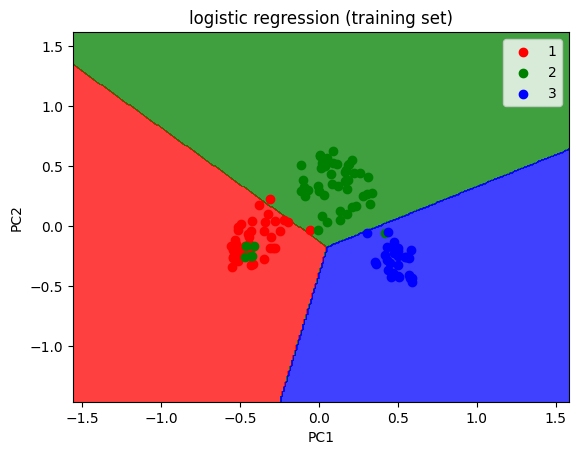

In [19]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green','blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('logistic regression (training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

VISUALISING THE TEST SET RESULT

/tmp/ipython-input-1568881010.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


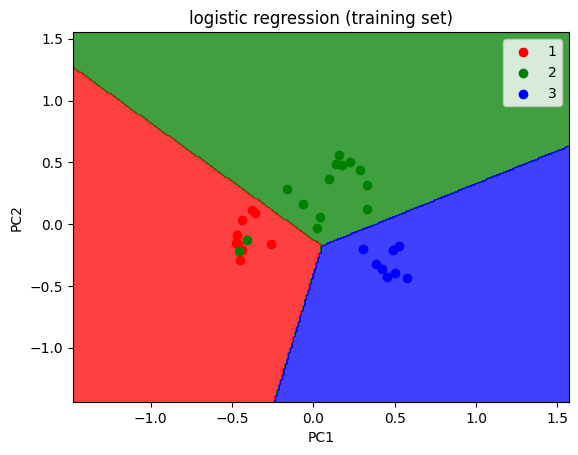

In [20]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green','blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('logistic regression (training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()